#### Assignment 1  - Your Name Here (Your NUSNET ID Here)
This answer sheet contains your answer to questions in Section 1~4. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

**Import all libraries and load data here**

initial centroids :  [[ 0  1]
 [ 0  0]
 [ 0 -1]]
iteration 0, centroids [[ 0.  1.]
 [ 0.  0.]
 [ 0. -1.]], WCSS 150.0, labels [0 1 2 0 1 2 0 1 2]
iteration 1, centroids [[ 0.  1.]
 [ 0.  0.]
 [ 0. -1.]], WCSS 150.0, labels [0 1 2 0 1 2 0 1 2]
iteration 2, centroids [[ 0.  1.]
 [ 0.  0.]
 [ 0. -1.]], WCSS 150.0, labels [0 1 2 0 1 2 0 1 2]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Heuristic initial centroids :  [[-5.  1.]
 [ 5. -1.]
 [ 0.  0.]]
iteration 0, centroids [[-5.  0.]
 [ 5.  0.]
 [ 0.  0.]], WCSS 6.0, labels [0 0 0 2 2 2 1 1 1]
iteration 1, centroids [[-5.  0.]
 [ 5.  0.]
 [ 0.  0.]], WCSS 6.0, labels [0 0 0 2 2 2 1 1 1]
iteration 2, centroids [[-5.  0.]
 [ 5.  0.]
 [ 0.  0.]], WCSS 6.0, labels [0 0 0 2 2 2 1 1 1]


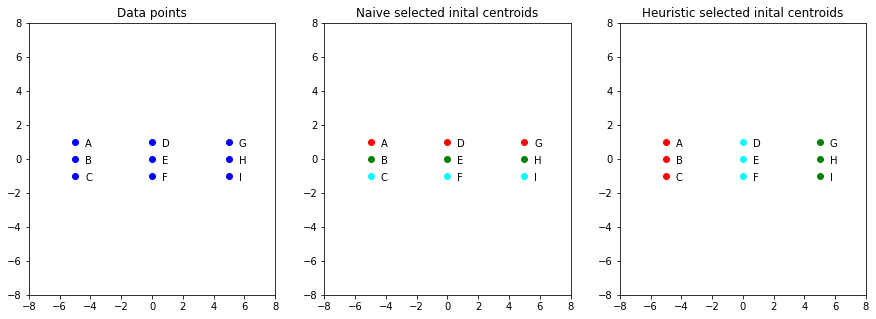

In [14]:
# This is a code cell
# -- Import all libraries and load data in this cell --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import linalg as LA
%matplotlib inline

c=['red','green','cyan','magenta']
k_cluster = 3
X = np.array([[-5, 1], [-5, 0], [-5, -1],
              [0, 1], [0, 0], [0, -1],
              [5, 1], [5, 0], [5, -1]])
n_X = X.shape[0] 
point_names = np.array(["A","B","C","D","E","F","G","H","I"])

centroids = np.array([[0, 1], [0, 0], [0, -1]])
print("initial centroids : ", centroids)

kmeans = None
for it in range(3):
    kmeans = KMeans(n_clusters=3, init=centroids,n_init=1, max_iter=1).fit(X)
    print("iteration {}, centroids {}, WCSS {}, labels {}".format(it, kmeans.cluster_centers_, kmeans.inertia_, kmeans.labels_))
    centroid = kmeans.cluster_centers_

k_labels = kmeans.labels_
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.set(xlim=(-8, 8), ylim=(-8, 8))
ax1.set_title('Data points')

ax2.set(xlim=(-8, 8), ylim=(-8, 8))
ax2.set_title('Naive selected inital centroids')

ax3.set(xlim=(-8, 8), ylim=(-8, 8))
ax3.set_title('Heuristic selected inital centroids')

ax1.scatter(X[:,0], X[:,1], color='b')
for i, name in enumerate(point_names):
    ax1.annotate(name, (X[i][0], X[i][1]), textcoords="offset points", xytext=(10,-5))

for i in range(n_X):
    ax2.scatter(X[i][0], X[i][1], color=c[k_labels[i]])
for i, name in enumerate(point_names):
    ax2.annotate(name, (X[i][0], X[i][1]), textcoords="offset points", xytext=(10,-5))
    
    
#### Heuristic selected centroid
heuristic_centroids = np.zeros((3,2))
heuristic_centroids[0] = [-5, 1]

for i in range(1, k_cluster):
    head_centroids = heuristic_centroids[0:i,:]
    min_dist = np.zeros(n_X)    
    for j in range(n_X):
        l2_norm = np.zeros(i)
        for m in range(i):
            l2_norm[m] = LA.norm(X[j]-head_centroids[m])
        min_dist[j] = np.amin(l2_norm)
    heuristic_centroids[i] = X[np.argmax(min_dist)]

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

print("Heuristic initial centroids : ", heuristic_centroids)
            
for it in range(3):
    kmeans = KMeans(n_clusters=3, init=heuristic_centroids,n_init=1, max_iter=1).fit(X)
    print("iteration {}, centroids {}, WCSS {}, labels {}".format(it, kmeans.cluster_centers_, kmeans.inertia_, kmeans.labels_))
    heuristic_centroids = kmeans.cluster_centers_

k_labels = kmeans.labels_

for i in range(n_X):
    ax3.scatter(X[i][0], X[i][1], color=c[k_labels[i]])
    
for j, name in enumerate(point_names):
    ax3.annotate(name, (X[j][0], X[j][1]), textcoords="offset points", xytext=(10,-5))
    


### Section 1 - Clustering and Initialization (20 points)

<span style="color:blue"> Consider the nine data points (A, B, C, D, E, F, G, H, I) in Fig. 1. Taking the points D, E, and F as the initial cluster centers, apply the K-Means algorithm on the data, with the number of clusters K = 3. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. Do you think this clustering result is satisfactory? </span>

K-mean = 3 and D(0,1), E(0,0), F(0,-1) are inital cluster centers. The k-mean algorithm running as below :

- initial cluster centers :  ((0,1), (0,0), (0,-1))
- iteration 0, update cluster centers : ((0,1), (0,0), (0,-1)), clusters: {(A,D,G),(B,E,H),(C,F,I)}
- iteration 1, update cluster centers : ((0,1), (0,0), (0,-1)), clusters: {(A,D,G),(B,E,H),(C,F,I)}
    
===> It looks like the k-mean converged after iteration 0. The clustering result which is {(A,D,G),(B,E,H),(C,F,I)}, is not satisfactory, because intra-cluster distances are not optimal


<span style="color:blue"> Initialization is important for K-means. Consider the following heuristic method for selecting the initial cluster center positions: <br><br>
Choose the first center $c_1$ as the point A.<br>
For $k=2,...,K$, set $c_k = \underset{x\in X}{\arg\max}(\underset{i=1,...,k-1}{\min}\Vert x - c_i \Vert_2)$, where X is the set of data points.<br><br>
Apply this heuristic to the data points in Fig. 1. Show the computed cluster centers for K = 3. Next, run the K-means algorithm with the obtained cluster centers. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.
</span>

K-mean = 3. Choosing A is first cluster center and following heuristic method for selecting the initial cluster centers. We obtain inital cluster centers are  A(-5, 1), I(5,-1), E(0,0). The k-mean algorithm running as below : 

- initial cluster centers :  ((-5, 1), (5,-1), (0,0))
- iteration 0, update cluster centers : ((-5,0), (5,0), (0,0)), clusters: {(A,B,C),(D,E,F),(G,H,I)}
- iteration 1, update cluster centers : ((-5,0), (5,0), (0,0)), clusters: {(A,B,C),(D,E,F),(G,H,I)}
    
===> The k-mean also converged after iteration 0. The clustering result which is {(A,B,C),(D,E,F),(G,H,I)}, is satisfactory, because intra-cluster distances are optimal

### Section 2 - Selecting the Number of Clusters (10 points)

<span style="color:blue"> Here, we will explore how to select the number of clusters. Using Python 3.6, load the attached data file 'assignment1.data' using the following commands:</span>
    
<span style="color:blue">import joblib<br>X = joblib.load('assignment1.data')</span>

<span style="color:blue">This results in X, which is a 400 by 2 matrix, where each row is a single sample, in 2 dimensions. Apply K-means on these samples with K ranging from 1 to 10. Plot a figure, where the y-axis is the Within Cluster Sum of Squares (WCSS) after convergence, and the x-axis is K from 1 to 10: </span>

<span style="color:blue">$WCSS = \sum_{k=1}^K \sum_{x \in C_i} \Vert x - c_i \Vert_2^2$</span>

<span style="color:blue">Select a value of K that you think is appropriate for clustering this dataset, and explain the reason. </span>

(400, 2)
k=1, WCSS=22800.675548638064, iter_num=2
k=2, WCSS=10437.716090329679, iter_num=4
k=3, WCSS=3937.5280395580567, iter_num=3
k=4, WCSS=517.886091708018, iter_num=2
k=5, WCSS=463.4624719171647, iter_num=3
k=6, WCSS=414.52318557518396, iter_num=7
k=7, WCSS=369.1299656920243, iter_num=9
k=8, WCSS=343.0426872462724, iter_num=8
k=9, WCSS=297.1397414721983, iter_num=8
k=10, WCSS=270.50465714180785, iter_num=15


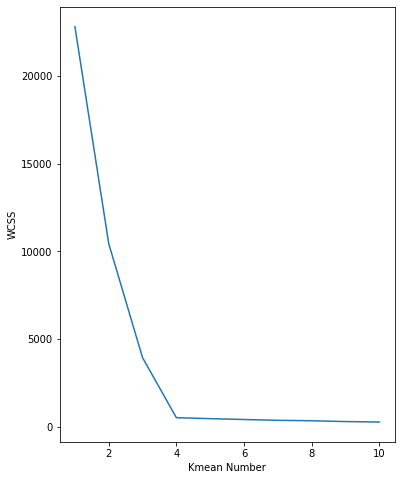

In [2]:
# This is a code cell
# -- Your code for running clustering and plotting the figure goes here.
import joblib
X = joblib.load('assignment1.data')
print(X.shape)
kmean_wcss = np.zeros((10,2), dtype='float')
kmean_num = 10

for k in range(1, kmean_num+1):
    k_th = KMeans(n_clusters=k, random_state=0).fit(X)
    print("k={}, WCSS={}, iter_num={}".format(k, k_th.inertia_,  k_th.n_iter_))
    kmean_wcss[k-1]= [k, k_th.inertia_]

plt.figure(figsize=(6, 8))
plt.plot(kmean_wcss[:,0], kmean_wcss[:,1])
plt.xlabel('Kmean Number')
plt.ylabel('WCSS')
plt.show()


Choosing K=4 is appropriate for clustering the dataset. Because base on the plot, the WCSS figure drops sharply from k = 1 to k = 4 and goes down gradually from k=4 to k=10

### Section 3 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> 1) Before continuing, let us examine the dataset for “dirty” records to do some data cleaning. Remove the records with negative values of the Quantity variable, and the records with NaN values of the CustomerID variable. Report how many records were removed in total. </span>

To purify the data, we do two removing steps :

- Step 1: Finding records contain NaN values of the CustomerID variable in the data, then 135080 records are found and remove them from the data
- Step 2: Finding records contain negative values of the Quantity variable in the modified data in step 1, then 8905 records are found and remove them from the modified data

Totally, 143985 records are removed from the data for data cleaning

In [10]:
# This is a code cell
# -- Your code for removing dirty records goes here --
origin_data = pd.read_csv('record.csv')
print(origin_data.shape)
print(origin_data.keys())

nan_customer_id = origin_data[origin_data['CustomerID'].isnull()].index
nan_customer_id_len = nan_customer_id.shape[0]
clean_data1 = origin_data.drop(nan_customer_id, axis=0)
print("{} NaN in CustomerID col are removed from orginal data".format(nan_customer_id_len))
print(clean_data1.shape)

neg_quantity = clean_data1[clean_data1['Quantity'] < 0].index
neg_quantity_len = neg_quantity.shape[0]
print("{} negative in Quantitycol are removed from the cleaned data 1".format(neg_quantity_len))

clean_data2 = clean_data1.drop(neg_quantity, axis=0)
print(clean_data2.shape)

print("{} rows are removed from original data".format(nan_customer_id_len + neg_quantity_len))


(541909, 7)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')
135080 NaN in CustomerID col are removed from orginal data
(406829, 7)
8905 negative in Quantitycol are removed from the cleaned data 1
(397924, 7)
143985 rows are removed from original data


<span style="color:blue"> 2)~9) Please provide the answers to the questions listed in the table. </span>

In [15]:
# This is a code cell
# -- (Optional) Your code for filling in the table goes here. --
customerid_groupby = clean_data2.groupby('CustomerID')
invoiceno_groupby = clean_data2.groupby('InvoiceNo')
stockcode_groupby = clean_data2.groupby('StockCode').count()

customerid_nunique = customerid_groupby.nunique()
max_trans_val = customerid_nunique.InvoiceNo.max()
customerid_max_trans = customerid_nunique[customerid_nunique.InvoiceNo == max_trans_val]


max_sale_vol = stockcode_groupby.InvoiceNo.max()
stockcode_max_sale_vol = stockcode_groupby[stockcode_groupby.InvoiceNo == max_sale_vol]

print('Starting date of the dataset : ', clean_data2.InvoiceDate.min())
print('Starting date of the dataset : ', clean_data2.InvoiceDate.max())
print('Number of customers :', len(customerid_groupby))
print('Number of transactions: ', len(invoiceno_groupby))
print('Number of different kind of items: ',len(stockcode_groupby))
print('Number of transactions customer ID 17850 have made: ', customerid_nunique.loc[17850].InvoiceNo)
print('\n')
print('Which customer (ID) have made the most transactions: \n', customerid_max_trans)
print('\n')
print('What is the item ID (i.e. StockCode) of the best-seller?\
We define “best-seller” as the item with the highest sales volume:\n', stockcode_max_sale_vol)


Starting date of the dataset :  2010-12-01 08:26:00
Starting date of the dataset :  2011-12-09 12:50:00
Number of customers : 4339
Number of transactions:  18536
Number of different kind of items:  3665
Number of transactions customer ID 17850 have made:  34


Which customer (ID) have made the most transactions: 
             InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
CustomerID                                                             
12748.0           210       1768         1778        58          211   

            UnitPrice  
CustomerID             
12748.0            99  


What is the item ID (i.e. StockCode) of the best-seller?We define “best-seller” as the item with the highest sales volume:
            InvoiceNo  Description  Quantity  InvoiceDate  UnitPrice  \
StockCode                                                             
85123A          2035         2035      2035         2035       2035   

           CustomerID  
StockCode              
85123A 

This is a markdown cell. Please fill in your answer for (2)~(9).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 2)  | Starting date of the dataset?                                                                              | _2010-12-01 08:26:00_ |
| 3)  | Ending date of the dataset?                                                                                | _2011-12-09 12:50:00_ |
| 4)  | Number of customers?                                                                                       | _4339_ |
| 5)  | Number of transactions?                                                                                    | _18536_ |
| 6)  | Number of different kind of items?                                                                         | _3665_ |
| 7)  | Number of transactions customer ID 17850 has made?                                                         | _34_ |
| 8)  | Which customer (ID) has made the most transactions?                                                        | _12748.0_ |
| 9)  | What is the item ID (i.e. StockCode) of the best-seller? We define "best-seller" as the item with the highest sales volume. | _85123A_ |

<span style="color:blue"> 10) Next, let us get some general understanding about the transactions. Please make a histogram of the number of unique items per transaction (as described below) and describe one insight that you can observe from the plot.  
(Note: You can plot this histogram by running matplotlib.hist() with 200 bins on the sequence of values $n_1, …, n_N$, where $n_i$ is the number of unique items in transaction $i$. This produces a histogram with “number of unique items in transaction” in the x-axis, and “count” in the y-axis, i.e. each bar counts how many transactions fall into the corresponding bucket. It is sufficient to comment on the general shape of the curve and what it implies about the data; it’s fine if the insight does not seem especially interesting.)
</span>

unique_items_per_trans :  [ 7  2 12 ... 21  4 15]


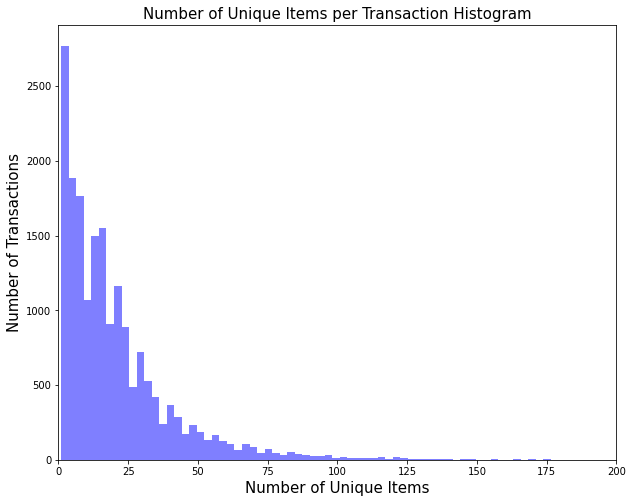

In [13]:
# This is a code cell
# --- Your code for generating the histogram goes here ---
invoiceno_nunique = invoiceno_groupby.nunique()
#number of unique items per transaction list
unique_items_per_trans= invoiceno_nunique.loc[invoiceno_nunique.index.values]['StockCode']
y_trans_count = unique_items_per_trans.values
print ("unique_items_per_trans : ", y_trans_count)

num_bins = 200
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(y_trans_count, num_bins, facecolor='blue', alpha=0.5)
plt.xlim(0, num_bins)
plt.xlabel('Number of Unique Items',fontsize=15)
plt.ylabel('Number of Transactions',fontsize=15)
plt.title('Number of Unique Items per Transaction Histogram',fontsize=15)
plt.show()

According to the histogram, it is easy to see that the number of transactions and the number of unique items are inverse ratio. Whereby, the curve which connects all bin tops, is similar to curve of a reciprocal function. Most of transactions only contain some unique items. Specifically, transactions whose number of unique items are less than 25, appear often. In the opposite direction, less transactions order 100 unique items onward

#### Section 4 - Mining Association Rules

<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

There are 3665 unique items in transactions, if we use brute-force to find association rules, we need to go through $2^{3665}$ itemsets, so total time taken is $\frac{2^{3665}}{2^{36}} = 2^{3629}$ seconds, is approximate to $\frac{2^{3629}}{2^{25}} = 2^{3604}$ years

==> The time taken is so huge, we will complete the counting after at least $\frac{2^{3604}}{2^{23}} = 2^{3581}$ Suns burn out

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.025, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [20]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
import time
from efficient_apriori import apriori
invoiceno_stockcode_groupby = clean_data2.groupby(['InvoiceNo','StockCode']).count().index.values
invoiceno_stockcode_dic = {}
for item in invoiceno_stockcode_groupby:
    if item[0] in invoiceno_stockcode_dic:
        invoiceno_stockcode_dic[item[0]].append(item[1])
    else:
        invoiceno_stockcode_dic[item[0]]=[item[1]]
        
transactions = list(invoiceno_stockcode_dic.values())
t1 = time.time()
_ , rules = apriori(transactions, min_support=0.025, min_confidence=0.2, max_length=4)
t2 = time.time()
print('duration : {}'.format(t2-t1))
print('rule length :', len(rules))
# Print out all rules are sorted by lift
for rule in sorted(rules, key=lambda rule: rule.lift):
    print(rule)  # Prints the rule and its confidence, support, lift, ...

duration : 16.497943878173828
rule length : 22
{85099B} -> {23203} (conf: 0.292, supp: 0.025, lift: 5.020, conv: 1.331)
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{22382} -> {20725} (conf: 0.473, supp: 0.025, lift: 6.797, conv: 1.764)
{20725} -> {22382} (conf: 0.362, supp: 0.025, lift: 6.797, conv: 1.485)
{20727} -> {20725} (conf: 0.491, supp: 0.028, lift: 7.067, conv: 1.830)
{20725} -> {20727} (conf: 0.401, supp: 0.028, lift: 7.067, conv: 1.575)
{22383} -> {20725} (conf: 0.498, supp: 0.028, lift: 7.156, conv: 1.852)
{20725} -> {22383} (conf: 0.403, supp: 0.028, lift: 7.156, conv: 1.580)
{85099B} -> {22386} (conf: 0.341, supp: 0.029, lift: 7.262, conv: 1.447)
{22386} -> {85099B} (conf: 0.627, supp: 0.029, lift: 7.262, conv: 2.449)
{22383} -> {20727} (conf: 0.446, supp: 0.025, lift: 7.855, conv: 1.702)
{20727} -> {22383} (conf: 0.442, supp: 0.025, lift: 7.855, conv: 1.691)
{22384} -> {20725} (conf: 0.562, supp: 0.028, lift: 8.078, conv: 2.123)
{20725} -> {2

Run efficient-apriori in python with **min_support=0.025, min_confidence=0.2, max_length=4**, we obtain 22 association rules from frequent 2-itemsets. From the result, the highest lift is 18.534 :
- {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
- {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=0.02, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [17]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
t1 = time.time()
_ , rules = apriori(transactions, min_support=0.02, min_confidence=0.2,max_length=4)
t2 = time.time()
print('duration : {}'.format(t2-t1))
print('rule length :', len(rules))
# Print out all rules are sorted by lift
for rule in sorted(rules, key=lambda rule: rule.lift):
    print(rule)  # Prints the rule and its confidence, support, lift, ...

duration : 39.516260385513306
rule length : 88
{85099B} -> {20725} (conf: 0.266, supp: 0.023, lift: 3.820, conv: 1.267)
{20725} -> {85099B} (conf: 0.330, supp: 0.023, lift: 3.820, conv: 1.363)
{85099B} -> {23203} (conf: 0.292, supp: 0.025, lift: 5.020, conv: 1.331)
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{47566} -> {23298} (conf: 0.282, supp: 0.021, lift: 5.178, conv: 1.317)
{23298} -> {47566} (conf: 0.386, supp: 0.021, lift: 5.178, conv: 1.506)
{85099B} -> {22411} (conf: 0.247, supp: 0.021, lift: 5.807, conv: 1.272)
{22411} -> {85099B} (conf: 0.501, supp: 0.021, lift: 5.807, conv: 1.832)
{22699} -> {22423} (conf: 0.536, supp: 0.023, lift: 5.835, conv: 1.959)
{22423} -> {22699} (conf: 0.246, supp: 0.023, lift: 5.835, conv: 1.271)
{22697} -> {22423} (conf: 0.541, supp: 0.020, lift: 5.888, conv: 1.979)
{22423} -> {22697} (conf: 0.219, supp: 0.020, lift: 5.888, conv: 1.233)
{23209} -> {20725} (conf: 0.417, supp: 0.023, lift: 5.989, conv: 1.595)
{20725} -> 

Run efficient-apriori in python with **min_support=0.02, min_confidence=0.2, max_length=4**, we get 88 association rules from frequent 2-itemsets and frequent 3-itemsets. The highest lift is 24.033 :
- {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)
- {22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.025, min_confidence=0.4, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [21]:
# This is a code cell
# --- Your code for apriori algorithm goes here ---
t1 = time.time()
_ , rules = apriori(transactions, min_support=0.025, min_confidence=0.4,max_length=4)
t2 = time.time()
print('duration : {}'.format(t2-t1))
print('rule length :', len(rules))
# Print out all rules are sorted by lift
for rule in sorted(rules, key=lambda rule: rule.lift):
    print(rule)  # Prints the rule and its confidence, support, lift, ...

duration : 16.87396502494812
rule length : 19
{23203} -> {85099B} (conf: 0.433, supp: 0.025, lift: 5.020, conv: 1.612)
{22382} -> {20725} (conf: 0.473, supp: 0.025, lift: 6.797, conv: 1.764)
{20727} -> {20725} (conf: 0.491, supp: 0.028, lift: 7.067, conv: 1.830)
{20725} -> {20727} (conf: 0.401, supp: 0.028, lift: 7.067, conv: 1.575)
{22383} -> {20725} (conf: 0.498, supp: 0.028, lift: 7.156, conv: 1.852)
{20725} -> {22383} (conf: 0.403, supp: 0.028, lift: 7.156, conv: 1.580)
{22386} -> {85099B} (conf: 0.627, supp: 0.029, lift: 7.262, conv: 2.449)
{22383} -> {20727} (conf: 0.446, supp: 0.025, lift: 7.855, conv: 1.702)
{20727} -> {22383} (conf: 0.442, supp: 0.025, lift: 7.855, conv: 1.691)
{22384} -> {20725} (conf: 0.562, supp: 0.028, lift: 8.078, conv: 2.123)
{20725} -> {22384} (conf: 0.406, supp: 0.028, lift: 8.078, conv: 1.598)
{22384} -> {20727} (conf: 0.498, supp: 0.025, lift: 8.781, conv: 1.880)
{20727} -> {22384} (conf: 0.441, supp: 0.025, lift: 8.781, conv: 1.699)
{82494L} -> {824

Run efficient-apriori in python with **min_support=0.025, min_confidence=0.4, max_length=4**, we obtain 19 association rules from frequent 2-itemsets and the highest lift is 18.534 :
- {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)
- {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

<span style="color:blue"> 5) Compare the first two cases. How do they differ in the time taken for the algorithm to run, the number of rules found, and the lift of the highest lift rule? Briefly explain why each of these findings occur, based on the effects of changing min_support.  </span>

The below table shows time taken, number of rules, highest lift in between case 4-2 and 4-3:

|              | Case 4-2  | Case 4-3 |
|--------------|-----------|----------|
|**Time taken(s)** | 16.497    | 39.516   |
|**Number of rules**  |   22      | 88       |
|**Highest lift**    | 18.534    | 24.033   |

From the table, it is easy to see:
 - Case 4-3 takes time longer for the algorithm running than case 4-2
 - Case 4-3 has more association rules than case 4-2
 - Case 4-3 returns the highest lift is greater than the highest lift of case 4-2
 
 
These findings occur, because min_support in 4-3 is less than min_support in 4-2 :
- With smaller min_support, number of frequent itemsets in 4-3 is larger at level k-1, it leads Apriori algorithm traverses more nodes at level k on the itemset lattice. Hence, 4-3 has time taken longer than 4-2
- More frequent k-items are found in 4-3, more association rules can be generated on the same min_confidence 
- The lowest support of association rules in 4-3 is less than the lowest support in 4-2, so it is high probability that the highest lift in 4-3 is greater than the highest lift in 4-2

<span style="color:blue"> 6) Compare the first and third case. How do they differ in the number of rules found? Briefly explain why this finding occurs, based on the effects of changing min_confidence. </span>

The below table shows time taken, number of rules, highest lift in between case 4-2 and 4-4:

|              | Case 4-2  | Case 4-4 |
|--------------|-----------|----------|
|**Time taken(s)** | 16.497    | 16.873   |
|**Number of rules**  |   22      | 19       |
|**Highest lift**    | 18.534    | 18.534   |

It is easy to see that time taken and highest lift are same in two cases 4-2 and 4-4 except number of rules that 4-2 returns more associatin rules than 4-4

These findings occur bcause min_confidence in 4-4 is greater than min_confidence in 4-2:
- min_support are same in 4-4 and 4-2, number of frequent itemsets in 4-4 is as same as number of frequent itemsets in 4-2 at level k-1, so the apriori algorithm running on both cases have to traverse same node sets at level k on the itemset lattice. That why the time taken are similar for 4-2 and 4-4
- With min_confidence 4-4 is higher, more association rules in 4-4 are dropped at rule generation stage of the apriori algorithm. For this reason, number of rules in 4-4 is only less than or equals number of rules in 4-2
- The association rules with the highest lift in 4-2, have highest confidence, so these rules are not affected when min_confidence is increased from 0.2 to 0.4. Hence, the highest lift in 4-2 and 4-4 are same



<span style="color:blue"> 7) Report the descriptions of the items associated with the highest lift rule you found in the three queries (you may use any method to do this). Does the rule make sense? </span>

Replace stock code by it's description in all association rules, so we have :

Case 4-2 : 
- {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)

==> {ROSES REGENCY TEACUP AND SAUCER} -> {GREEN REGENCY TEACUP AND SAUCER}

- {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

==> {GREEN REGENCY TEACUP AND SAUCER} -> {ROSES REGENCY TEACUP AND SAUCER} 

Case 4-3 :
- {22697, 22699} -> {22698} (conf: 0.721, supp: 0.021, lift: 24.033, conv: 3.475)

==> {GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER} -> {PINK REGENCY TEACUP AND SAUCER}

- {22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)

==> {PINK REGENCY TEACUP AND SAUCER} -> {GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER} 

Case 4-4 :
- {22699} -> {22697} (conf: 0.691, supp: 0.029, lift: 18.534, conv: 3.115)

==> {ROSES REGENCY TEACUP AND SAUCER} -> {GREEN REGENCY TEACUP AND SAUCER}

- {22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)

==> {GREEN REGENCY TEACUP AND SAUCER} -> {ROSES REGENCY TEACUP AND SAUCER}

I see all association rules make sense because their lifts are many times greater than 1, so clients have high interest in these rules 